# Pandas

## What is Pandas?
A Python library providing data structures and data analysis tools.

## Huh?
Think of it like Excel for Python that doesn't suck.

In [ ]:
#By convention import pandas like:
import pandas as pd
#For fake data.
from numpy.random import randn
import numpy as np

# Series
Think of a Pandas Series as a _labeled_ one-dimensional vector. In fact, it need not be a numeric vector, it can contain arbitrary python objects.

In [ ]:
int_series = pd.Series([i + 10 for i in xrange(10)])
int_series.head(7)

In [ ]:
num_series = pd.Series(randn(10)) #randn(10) samples 10 values at random from a normal distribution of mean 0 and std 1
num_series.head()

In [ ]:
str_series = pd.Series([x for x in 'abcde'*2])
str_series.head(10)

In [ ]:
fun_series = pd.Series([lambda x: x*i for i in range(10)])
fun_series

# Indexes.
Notice how each series has an index (in this case a relatively meaningless default index).

Pandas can make great use of informative indexes. **Indexes work similarly to a dictionary key**, allowing fast lookups of the data associated with the index.

Indexes can also be exploited for fast group-bys, merges, time-series operations and lots more.

When you're really in the zone with pandas, you'll be thinking a lot about indexes.

In [ ]:
indexed_series = pd.Series(randn(5), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky']) #order of indices maintained
alt_indexed_series = pd.Series(randn(5),
                               index = ['Washington', 'Alabama', 
                                        'Montana', 'Indiana', 
                                        'New York']) #order of indices maintained

series_from_dict = pd.Series({'key1':1,'key0':0,'key5':5,'key3':6,'key2':7}) #dictionaries have no order, indices will be sorted

print indexed_series
print '\n'
print alt_indexed_series
print '\n'
print series_from_dict

In [ ]:
#Pandas uses the index by default to align series for arithmetic!
indexed_series + alt_indexed_series #matching indices will be added!

In [ ]:
indexed_series = pd.Series(randn(5*100), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky']*100)

#If you have non-unique indexes, you can use them 
#to do groupby operations.

# indexed_series
indexed_series.groupby(level=0).mean() #will be grouped by state and the mean calculated for each gruop (state)

In [ ]:
indexed_series['Alabama'] 
#there are 100 values for each state now, this is different from a dictionary and more like a database

In [ ]:
#Datetime index
dt_index = pd.date_range('2015-1-1', 
                        '2015-11-1', 
                        freq='M')
dt_series = pd.Series(randn(10), 
                      index = dt_index)
dt_series #will use last of each month by default, beginning of month by donig 'MS' (Capital! otherwise millisecond)

In [ ]:
#Datetime indexes make it easy to transform frequencies etc!
dt_series.resample('q').mean()
#note for last quarter the mean is just the same as the October value!

In [ ]:
dt_series #still the same, no transformation in place

# DataFrames
Data frames extend the concept of Series to table-like data.

Many Series with shared indices. Looks very much like a database table!

Can also defign column names/indices.

In [ ]:
df = pd.DataFrame(randn(10, 5), index=dt_index, columns=[x for x in 'abcde'])
df

In [ ]:
#A dataframes columns are series:
col = df.a
print col
type(col)

In [ ]:
df['a'] #same as df.a

In [ ]:
#So are the rows.
row = df.loc['2015-01-31'] #ix needs to be used for rows instead of direct indexing like for columns
type(row)

In [ ]:
# select row by row label
df.loc['2015-01-31']

In [ ]:
# select row by index
df.iloc[0] #this means first row

In [ ]:
# select row by either label OR index, tries by label and falls back to index if label not found
print df.ix['2015-01-31']
print df.ix[0]
#note: planned for deprecation!

In [ ]:
#The columns all have the same index:
col.index

In [ ]:
#What's the index for the rows?
row.index

# DataFrame basics

In [ ]:
#New column
df['new'] = df['a'] + df['b']
df['new2'] = 5
df

In [ ]:
df['a'] + df['b']

In [ ]:
#Delete a column
df = df.drop('new', axis=1)

In [ ]:
df

## Axis?
Because pandas thinks of rows and columns as both being series, anything we can do to rows we can do to columns too. 

Axis describes which one we want to do it to. 0=rows, 1=columns.

In [ ]:
lbl = pd.Timestamp('2015-04-30 00:00:00', freq='M')
print lbl
df.drop(lbl, axis=0)

In [ ]:
df #april still there! not done in place!

# Selecting subsets.
There a couple of ways to select a subset of a python data frame.

In [ ]:
#To subset the rows, you can use the convenient:
df[df['a'] > 0]

In [ ]:
print df['a'] > 0 #boolean filter!

In [ ]:
#Or combine multiple conditions:
df[(df.a > 0) & (df.c < 0)]

In [ ]:
#Selecting a column
df.a
#Works sometimes.

In [ ]:
df['a'] #works always

In [ ]:
df[['a', 'b']]
#Or a subset of columns

# Advanced selection.
The above methods work for simple types of selections, but what if you need something more complex?

In [ ]:
df.loc['2015-05-31':'2015-08-31', 'c':'e'] #Ranges by label.

In [ ]:
df #still the same

In [ ]:
df.iloc[2:-3,2:5] #Ranges by index number.

In [ ]:
#SQL-like queries for row selection.
#Experimental
df.query('a > 1 and c <1')

In [ ]:
#Multi Index:
dt_index = pd.date_range('2015-1-1', 
                        '2017-7-1', 
                        freq='m')
df = pd.DataFrame(randn(30,5), index=dt_index)
df

In [ ]:
df['state'] = ['Alabama', 'Alaska' , 'Arizona'] * 10
df.head() #creates new column with old indices

In [ ]:
df = df.reset_index()
df = df.set_index(['state', 'index']) #makes state a new index
df.head()

In [ ]:
#can now select by state
df.loc['Alabama'].head()

In [ ]:
df.loc['2015-01-31'] #Doesn't work. Date is not priary index anymore!

In [ ]:
df.loc[('Alabama', '2015-01-31')] #Can do this.

In [ ]:
#Can also have multi-index in columns.
df.reset_index().set_index(['index', 'state']).unstack().head() #unstack() pivots the table

In [ ]:
df.head(15) #same old, not in place

# split-apply-combine
* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

In [ ]:
df.groupby(level=0).mean() #level=1 is state

In [ ]:
df.groupby(level=1).mean().head() #Groupby index #level=1 is date

In [ ]:
#Groupby doesn't have to be on index. Can be on any regular column!
df.reset_index().head().groupby('state').mean().head()
#'state' could be replaced with a list of columns to group on, say ['state','city']

In [ ]:
#Split
g = df.groupby(level=0)

In [ ]:
#Apply
#If one row for each index.
#g.aggregate(np.mean)
g.mean()

# Skip the following three cells

In [ ]:
#.transform() returns an object of the same shape as original df being grouped
# a transform should be a reducing function and needs to return a scalar; 
#i.e. it returns a value for each value in the frame
# apply can handle a transform or an arbitrary return for each group
#print df.head()
#print g.apply(lambda x: (x - x.mean())/x.std()).head()
#print g.transform(lambda x: (x - x.mean())/x.std()).head()

In [ ]:
#Different index than I started with.
#g.apply(lambda x: x.describe()) #cannot use transform here because result different shape and index than original df

In [ ]:
#df

# Reading and writing data.


In [ ]:
df.to_csv('saved_data.csv', sep='\t') #saves DF as tsv file

In [ ]:
read = pd.read_csv('saved_data.csv', sep='\t')
#TONS OF options for reading data

In [ ]:
read

In [ ]:
"""Other methods:
pd.read_excel
pd.read_sql
pd.read_stata
...
"""

# Other very useful things.

join, concat and merge

In [ ]:
state_df = pd.DataFrame({'governor':['Robert Bentley',
                                    'Bill Walker',
                                    'Doug Ducey',
                                    'Asa Hutchinson']}, 
                        index=['Alaska', 'Alabama', 'Arizona', 'Arkansas'])
state_df

In [ ]:
#Note merge is most useful when you want to merge on something other than the index.
#Default is to merge on common column names.
pd.merge(df.reset_index(), state_df, 
          left_on='state', right_index=True, how='left').tail() 
#left: use only keys from left frame, similar to a SQL left outer join; preserve key order
#it tries to match the "state" field from the left DF (left_on) with the right index (right_index=True)
#if we want to merge on two columns we would use left_on and right_on. 
#If we want to merge on two indices we would set left_index and right_index to True. 
# Latter is the same as .join() (see below)

In [ ]:
state_avg = df.groupby(level=0).mean()
state_avg.head()

In [ ]:
#Concat allows joining along the axes.
pd.concat([state_avg, state_df], axis=1)
#there are no values for Arkansas in the original df or the state_avg df, 
#but there is a value for the governor in state_df

In [ ]:
#Join also works. Just like merge, but 
#default is to join on indexes.
state_avg.join(state_df, how='left') #ignores Akransas because left join, and left df has no Arkansas

# Exploratory Data Analysis with Pandas
## More on this next week!

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
df = pd.read_csv('data/playgolf.csv', delimiter='|' )
print df

          Date   Outlook  Temperature  Humidity  Windy      Result
0   07-01-2014     sunny           85        85  False  Don't Play
1   07-02-2014     sunny           80        90   True  Don't Play
2   07-03-2014  overcast           83        78  False        Play
3   07-04-2014      rain           70        96  False        Play
4   07-05-2014      rain           68        80  False        Play
5   07-06-2014      rain           65        70   True  Don't Play
6   07-07-2014  overcast           64        65   True        Play
7   07-08-2014     sunny           72        95  False  Don't Play
8   07-09-2014     sunny           69        70  False        Play
9   07-10-2014      rain           75        80  False        Play
10  07-11-2014     sunny           75        70   True        Play
11  07-12-2014  overcast           72        90   True        Play
12  07-13-2014  overcast           81        75  False        Play
13  07-14-2014      rain           71        80   True  Don't 

# Describe the continuous variables

In [93]:
df['Windy'] = df["Windy"].astype('bool')
df.describe().T
#describes numerical fields

,count,mean,std,min,25%,50%,75%,max
Temperature,14.0,73.571429,6.571667,64.0,69.25,72.0,78.75,85.0
Humidity,14.0,80.285714,9.840486,65.0,71.25,80.0,88.75,96.0


Can see the general pattern of Temperature and Humidity

## We can make use of df.plot() to produce simple graphs that calls on the more adjustable Matplotlib library 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10db68550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10ded01d0>]], dtype=object)

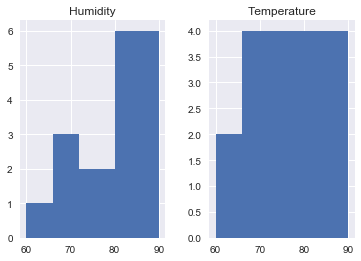

In [94]:
import seaborn as sns
df.hist(['Temperature','Humidity'],bins=[60,66,72,80,90])

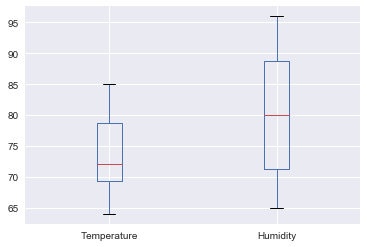

In [95]:
df[['Temperature','Humidity']].plot(kind='box')

### Scatterplots for examining bivariate relationships

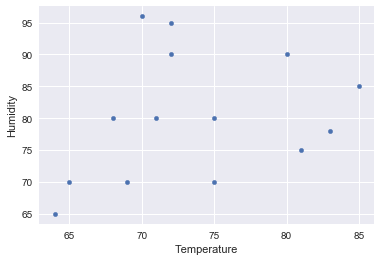

In [96]:
reload(plt)
df.plot('Temperature', 'Humidity', kind='scatter')

### If we want to color the scatterplots according to a category, it requires a bit of matplotlib...ugh!
### more on matplotlib later!

In [97]:
groups=df.groupby('Outlook')
for name, group in groups:
    print name

overcast
rain
sunny


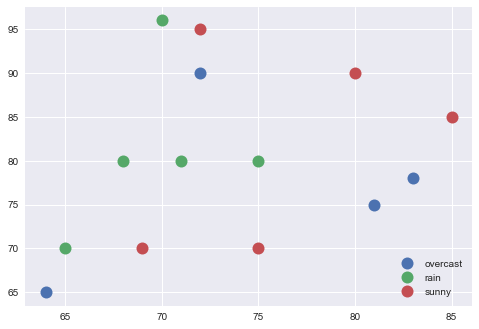

In [98]:
sns.set()
fig, ax = plt.subplots()

ax.margins(0.05)
for name, group in groups:
    ax.plot(group.Temperature, group.Humidity, marker='o', linestyle='', ms=12, label=name)
ax.legend(numpoints=1, loc='lower right')

plt.show()

# What about the categorical variables? Frequency tables and relative frequency tables

### Simply df.value_counts() gets you the frequencies

In [99]:
df['Outlook'].value_counts()

rain        5
sunny       5
overcast    4
Name: Outlook, dtype: int64

### Using apply will get you the value counts for multiple columns at once

In [100]:
df[['Outlook','Result']].apply(lambda x: x.value_counts())

,Outlook,Result
Don't Play,NaN,5.0
Play,NaN,9.0
overcast,4.0,NaN
rain,5.0,NaN
sunny,5.0,NaN


### Contingency Tables for looking at bivariate relationships between two categorical variables

In [101]:
pd.crosstab(df['Outlook'],df['Result'])

Result,Don't Play,Play
Outlook,,
overcast,0,4
rain,2,3
sunny,3,2


### Often we want the row percentages

In [103]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda r: r/r.sum(), axis=1)

Result,Don't Play,Play
Outlook,,
overcast,0.0,1.0
rain,0.4,0.6
sunny,0.6,0.4


### Or the column percentages

In [104]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda c: c/c.sum(), axis=0)

Result,Don't Play,Play
Outlook,,
overcast,0.0,0.444444
rain,0.4,0.333333
sunny,0.6,0.222222


# Enough...lets get to the pair sprint

https://www.youtube.com/watch?v=yGf6LNWY9AI